<a href="https://colab.research.google.com/github/Akash-Tandale001/Water-Quality-Prediction/blob/main/Water_Quality_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
pip install klib -q

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import klib

df = pd.read_csv('./drive/MyDrive/ML_dataset_water/dataset.csv')
df.head()


Index        pH      Iron   Nitrate    Chloride           Lead      Zinc  \
0      0  8.332988  0.000083  8.605777  122.799772   3.713298e-52  3.434827   
1      1  6.917863  0.000081  3.734167  227.029851   7.849262e-94  1.245317   
2      2  5.443762  0.020106  3.816994  230.995630   5.286616e-76  0.528280   
3      3  7.955339  0.143988  8.224944  178.129940  3.997118e-176  4.027879   
4      4  8.091909  0.002167  9.925788  186.540872  4.171069e-132  3.807511   

            Color  Turbidity  Fluoride  ...  Chlorine     Manganese  \
0       Colorless   0.022683  0.607283  ...  3.708178  2.269945e-15   
1    Faint Yellow   0.019007  0.622874  ...  3.292038  8.024076e-07   
2    Light Yellow   0.319956  0.423423  ...  3.560224  7.007989e-02   
3  Near Colorless   0.166319  0.208454  ...  3.516907  2.468295e-02   
4    Light Yellow   0.004867  0.222912  ...  3.177849  3.296139e-03   

   Total Dissolved Solids  Source  Water Temperature  Air Temperature  \
0              332.118789     NaN                NaN        43.493324   
1              284.641984    Lake          15.348981        71.220586   
2              570.054094   River          11.643467        44.891330   
3              100.043838  Ground          10.092392        60.843233   
4              168.075545  Spring          15.249416        69.336671   

      Month   Day  Time of Day  Target  
0   January  29.0          4.0       0  
1  November  26.0         16.0       0  
2   January  31.0          8.0       0  
3     April   1.0         21.0       0  
4      June  29.0          7.0       0  

[5 rows x 24 columns]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5956842 entries, 0 to 5956841
Data columns (total 24 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   Index                   int64  
 1   pH                      float64
 2   Iron                    float64
 3   Nitrate                 float64
 4   Chloride                float64
 5   Lead                    float64
 6   Zinc                    float64
 7   Color                   object 
 8   Turbidity               float64
 9   Fluoride                float64
 10  Copper                  float64
 11  Odor                    float64
 12  Sulfate                 float64
 13  Conductivity            float64
 14  Chlorine                float64
 15  Manganese               float64
 16  Total Dissolved Solids  float64
 17  Source                  object 
 18  Water Temperature       float64
 19  Air Temperature         float64
 20  Month                   object 
 21  Day                     float64

In [ ]:
from sklearn.model_selection import train_test_split
df=df.drop(columns=['Index', 'Color' , 'Source' ,'Month','Day','Time of Day','Target',])
# df = df.dropna(how='any',axis=0)
train, test = train_test_split(df, test_size=50000, random_state=42)
test.info()
test.shape
test.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50000 entries, 1128309 to 5108582
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   pH                      49035 non-null  float64
 1   Iron                    49662 non-null  float64
 2   Nitrate                 49155 non-null  float64
 3   Chloride                48564 non-null  float64
 4   Lead                    49802 non-null  float64
 5   Zinc                    48741 non-null  float64
 6   Turbidity               49576 non-null  float64
 7   Fluoride                48272 non-null  float64
 8   Copper                  48352 non-null  float64
 9   Odor                    48495 non-null  float64
 10  Sulfate                 48309 non-null  float64
 11  Conductivity            48558 non-null  float64
 12  Chlorine                49585 non-null  float64
 13  Manganese               49058 non-null  float64
 14  Total Dissolved Solids  49989 

pH      Iron   Nitrate    Chloride          Lead      Zinc  \
1128309  6.865081  0.002090  6.665196  154.304661  2.532523e-08  2.100854   
4038656  8.218379  0.018253  7.960071  146.568255  9.387020e-08  1.566728   
1694494  8.222025  0.020773  7.661815  233.560403  1.685993e-45  0.347338   
5635998  7.614713  0.000039  4.735283  199.783328  1.200594e-56  0.379548   
1300268  8.469935  0.000005  3.459419  178.919805  1.382519e-89  0.255855   

         Turbidity  Fluoride    Copper      Odor     Sulfate  Conductivity  \
1128309   0.006723  1.901142  1.263176  1.040840  166.285918    190.085908   
4038656   0.103921  1.373210  0.189954  0.721160   74.803539    249.638471   
1694494   0.000054  1.536736  0.478412  0.964127  148.245938           NaN   
5635998   0.445300  0.816121  0.321648  1.033522         NaN    262.959440   
1300268   1.016629  0.514603  0.226024  0.827003  107.101669    120.771386   

         Chlorine     Manganese  Total Dissolved Solids  Water Temperature  \
1128309  2.726099  8.760657e-07               84.907959           9.178280   
4038656  3.912876  3.314244e-02              403.844600          13.791907   
1694494  2.647662  2.931158e-07              252.332438          13.512791   
5635998  2.667591  1.685162e-03              209.074768          13.761419   
1300268  2.091191  1.060475e-14              493.565135          14.048445   

         Air Temperature  
1128309        54.131764  
4038656        32.424483  
1694494        30.341995  
5635998        86.206134  
1300268        55.646842

In [ ]:
test.shape

(50000, 17)

In [ ]:
test.isnull().sum()

pH                         965
Iron                       338
Nitrate                    845
Chloride                  1436
Lead                       198
Zinc                      1259
Turbidity                  424
Fluoride                  1728
Copper                    1648
Odor                      1505
Sulfate                   1691
Conductivity              1442
Chlorine                   415
Manganese                  942
Total Dissolved Solids      11
Water Temperature         1397
Air Temperature            223
dtype: int64

In [ ]:
test.describe()

pH          Iron       Nitrate      Chloride           Lead  \
count  49035.000000  4.966200e+04  49155.000000  48564.000000   4.980200e+04   
mean       7.446960  1.304519e-01      6.173403    184.758151   1.516748e-03   
std        0.889855  4.796396e-01      3.296184     68.247429   3.361315e-02   
min        2.801098  4.085339e-46      0.574536     36.519099   0.000000e+00   
25%        6.891637  1.053921e-05      3.972940    138.787223  4.327630e-123   
50%        7.450435  2.280371e-03      5.600692    176.126976   3.727641e-63   
75%        8.013726  5.574463e-02      7.664772    218.529463   3.894478e-27   
max       12.098658  1.285932e+01     53.427926    867.121640   2.872971e+00   

               Zinc     Turbidity      Fluoride        Copper          Odor  \
count  4.874100e+04  4.957600e+04  48272.000000  48352.000000  48495.000000   
mean   1.554835e+00  5.263434e-01      0.962374      0.515188      1.810161   
std    1.545178e+00  9.294857e-01      0.822186      0.594394      1.069952   
min    5.547237e-07  1.207432e-12      0.000112      0.000001      0.011033   
25%    4.107115e-01  3.864923e-02      0.376092      0.129635      0.893030   
50%    1.088818e+00  2.093600e-01      0.775348      0.348546      1.787442   
75%    2.239984e+00  6.266098e-01      1.336631      0.699078      2.655562   
max    1.824161e+01  1.295938e+01      9.727751     10.057830      4.141952   

            Sulfate  Conductivity      Chlorine     Manganese  \
count  48309.000000  48558.000000  49585.000000  4.905800e+04   
mean     146.665158    425.781709      3.254536  1.109633e-01   
std       68.996286    190.191521      0.734309  4.947763e-01   
min       13.398252     30.057519      1.179372  3.235962e-43   
25%       98.015669    287.595020      2.746143  2.609552e-06   
50%      135.021181    397.924243      3.206320  6.962325e-04   
75%      182.396020    533.772620      3.698118  1.719358e-02   
max     1206.935953   1754.034369      8.843722  1.625244e+01   

       Total Dissolved Solids  Water Temperature  Air Temperature  
count            49989.000000       48603.000000     49777.000000  
mean               267.866844          19.138858        60.087852  
std                156.084842          11.447379        18.079612  
min                  0.021243           1.892527       -14.530029  
25%                133.202918          11.311873        47.971939  
50%                267.122582          16.428208        59.937627  
75%                398.878421          23.927105        72.266974  
max                579.795282         173.622756       133.695249

In [ ]:
test.pH.value_counts()

8.403842    2
8.449170    2
6.567326    2
7.607333    2
6.962505    2
           ..
7.579128    1
6.553982    1
8.067017    1
8.525157    1
7.472381    1
Name: pH, Length: 49021, dtype: int64

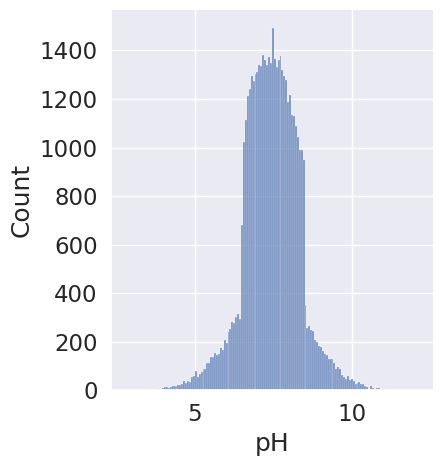

In [ ]:
import seaborn as sns
sns.displot(test['pH'])

<ipython-input-10-fdb466f764e1>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(test.corr(),annot=True, cmap='terrain', linewidths=0.1)


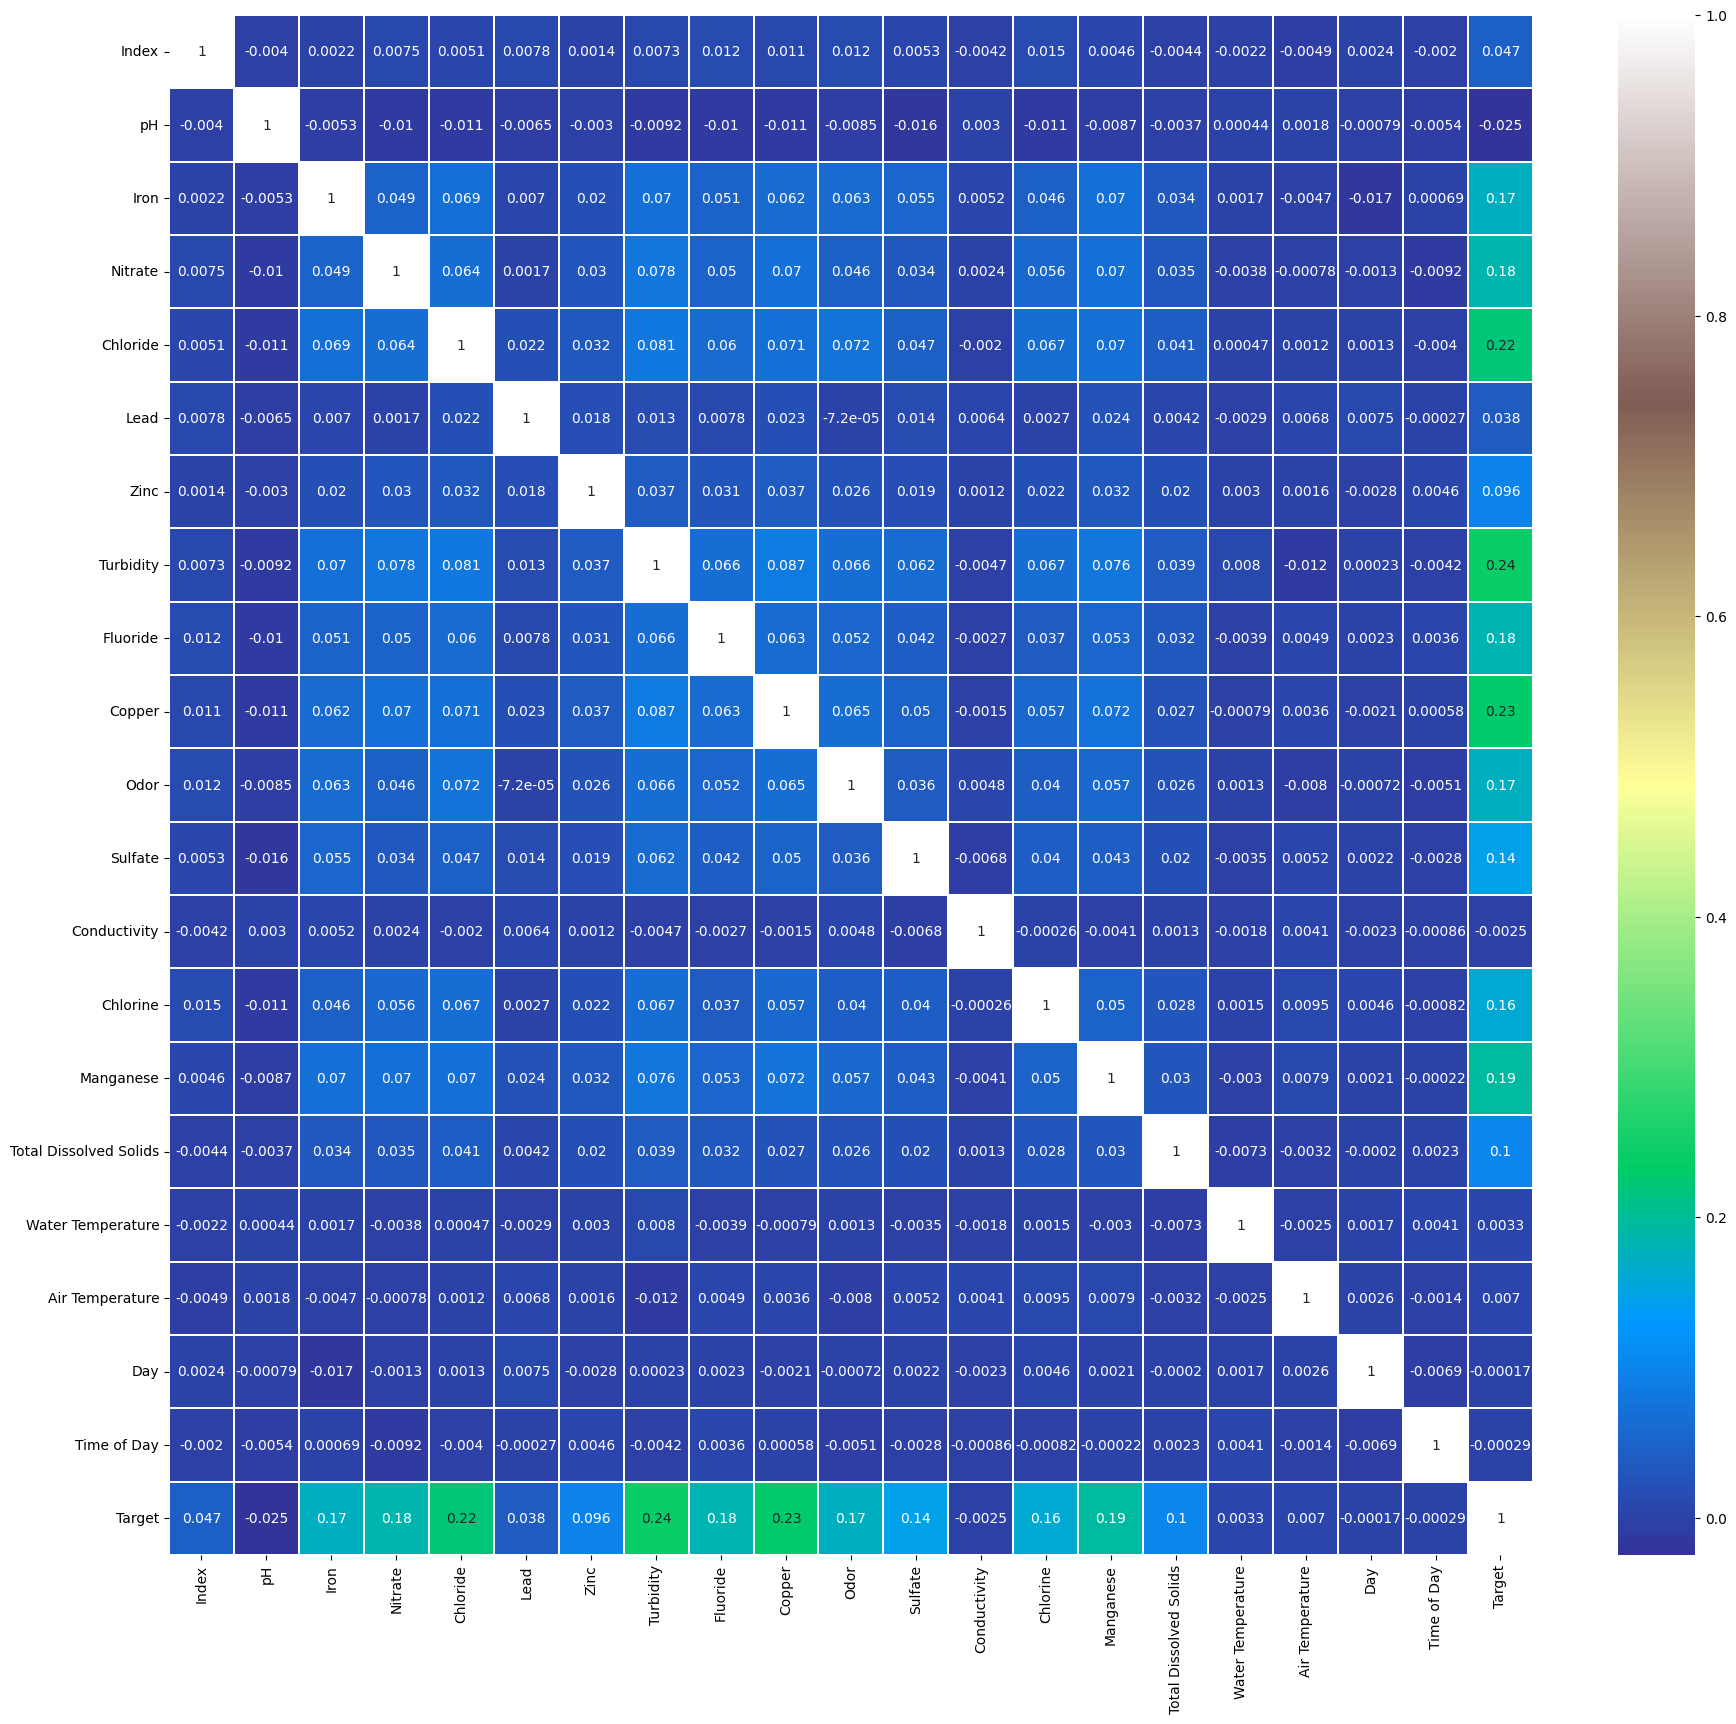

In [ ]:
sns.heatmap(test.corr(),annot=True, cmap='terrain', linewidths=0.1)
fig=plt.gcf()
fig.set_size_inches(22,20)
plt.show()


In [ ]:
test.isnull().sum()

Index                        0
pH                         965
Iron                       338
Nitrate                    845
Chloride                  1436
Lead                       198
Zinc                      1259
Color                       44
Turbidity                  424
Fluoride                  1728
Copper                    1648
Odor                      1505
Sulfate                   1691
Conductivity              1442
Chlorine                   415
Manganese                  942
Total Dissolved Solids      11
Source                     709
Water Temperature         1397
Air Temperature            223
Month                      814
Day                        830
Time of Day                994
Target                       0
dtype: int64

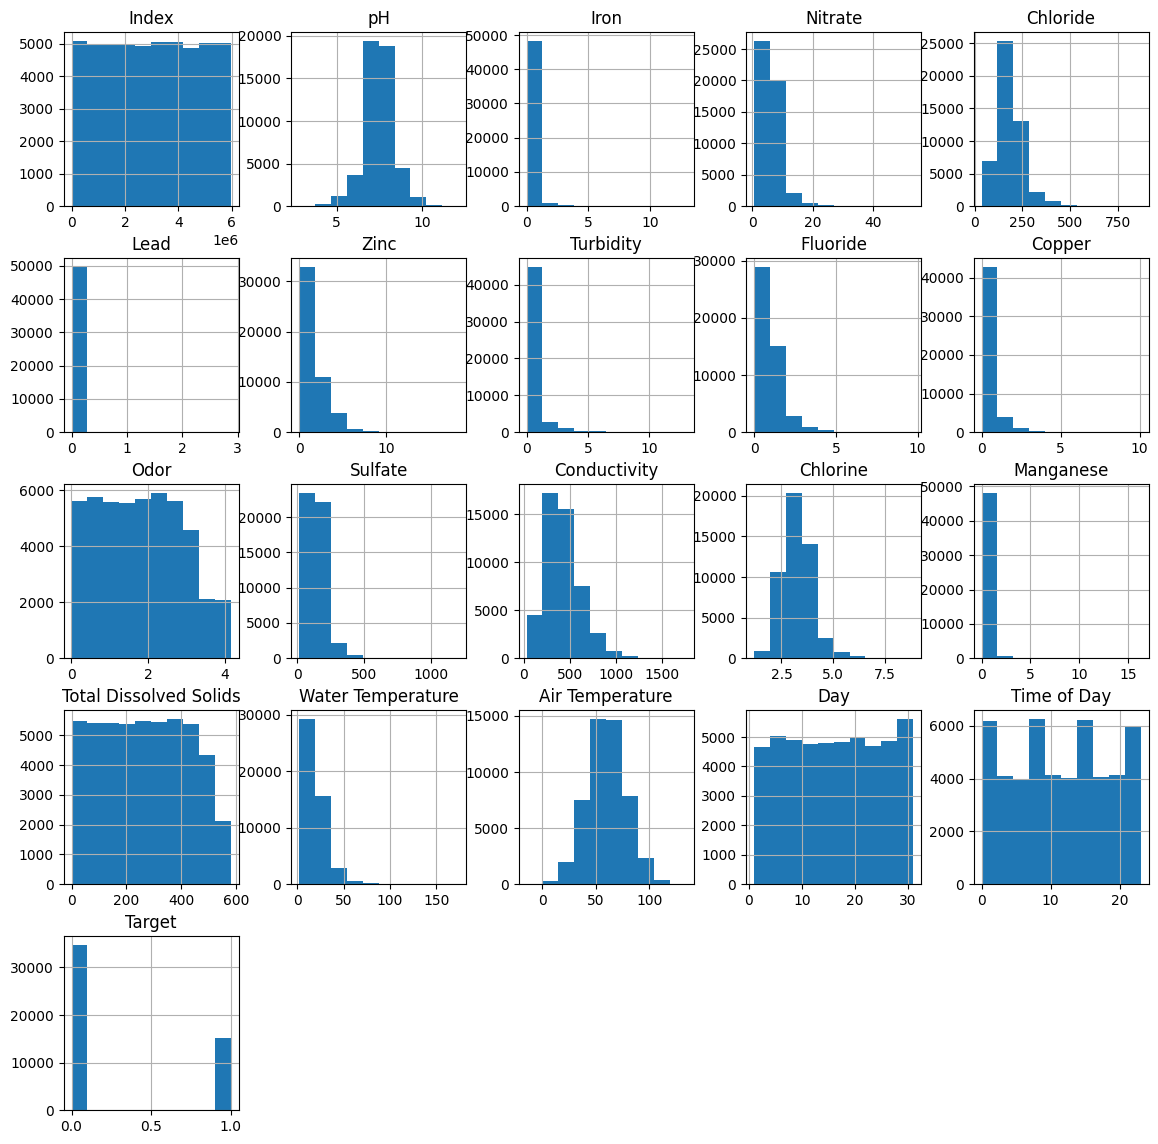

In [ ]:
test.hist(figsize=(14,14))
plt.show()

In [ ]:
import pandas as pd

#LIMITS ARE SET BY STANDARD VALUES GIVEN BY WHO (WORD HEALTH ORGANIZATION AFTER COVID STANDARD VALUES

max_limits = {
    'pH': 8.5,
    'Iron': 0.3,
    'Nitrate': 50,
    'Chloride': 250,
    'Lead': 0.01,
    'Zinc': 3,
    'Turbidity': 5,
    'Fluoride': 1.5,
    'Copper': 2,
    'Sulfate': 500,
    'Chlorine': 5,
    'Manganese': 0.4,
    'Total Dissolved Solids': 1000
}

min_limits = {
    'pH': 6.5,
    'Iron': 0,
    'Nitrate': 0,
    'Chloride': 100,
    'Lead': 0,
    'Zinc': 0,
    'Turbidity': 1,
    'Fluoride': 0.6,
    'Chlorine': 0.2,
    'Manganese': 0,
    'Total Dissolved Solids': 0,
}

data = pd.DataFrame(test)
# filtered_df = data[(data <= max_limits) & (data >= min_limits)]
# print(filtered_df)

data['Potability'] = ((data['pH'] >= min_limits['pH']) &
                    (data['pH'] <= max_limits['pH']) &
                    (data['Iron'] <= max_limits['Iron']) &
                    (data['Nitrate'] <= max_limits['Nitrate']) &
                    (data['Chloride'] <= max_limits['Chloride']) &
                    (data['Lead'] <= max_limits['Lead']) &
                    (data['Zinc'] <= max_limits['Zinc']) &
                    (data['Turbidity'] <= max_limits['Turbidity']) &
                    (data['Fluoride'] <= max_limits['Fluoride']) &
                    (data['Copper'] <= max_limits['Copper']) &
                    (data['Sulfate'] <= max_limits['Sulfate']) &
                    (data['Chlorine'] <= max_limits['Chlorine']) &
                    (data['Manganese'] <= max_limits['Manganese']) &
                    (data['Total Dissolved Solids'] <= max_limits['Total Dissolved Solids']))
data['Potability'] = data['Potability'].astype(int)

data.head()

pH      Iron   Nitrate    Chloride          Lead      Zinc  \
1128309  6.865081  0.002090  6.665196  154.304661  2.532523e-08  2.100854   
4038656  8.218379  0.018253  7.960071  146.568255  9.387020e-08  1.566728   
1694494  8.222025  0.020773  7.661815  233.560403  1.685993e-45  0.347338   
5635998  7.614713  0.000039  4.735283  199.783328  1.200594e-56  0.379548   
1300268  8.469935  0.000005  3.459419  178.919805  1.382519e-89  0.255855   

         Turbidity  Fluoride    Copper      Odor     Sulfate  Conductivity  \
1128309   0.006723  1.901142  1.263176  1.040840  166.285918    190.085908   
4038656   0.103921  1.373210  0.189954  0.721160   74.803539    249.638471   
1694494   0.000054  1.536736  0.478412  0.964127  148.245938           NaN   
5635998   0.445300  0.816121  0.321648  1.033522         NaN    262.959440   
1300268   1.016629  0.514603  0.226024  0.827003  107.101669    120.771386   

         Chlorine     Manganese  Total Dissolved Solids  Water Temperature  \
1128309  2.726099  8.760657e-07               84.907959           9.178280   
4038656  3.912876  3.314244e-02              403.844600          13.791907   
1694494  2.647662  2.931158e-07              252.332438          13.512791   
5635998  2.667591  1.685162e-03              209.074768          13.761419   
1300268  2.091191  1.060475e-14              493.565135          14.048445   

         Air Temperature  Potability  
1128309        54.131764           0  
4038656        32.424483           1  
1694494        30.341995           0  
5635998        86.206134           0  
1300268        55.646842           1

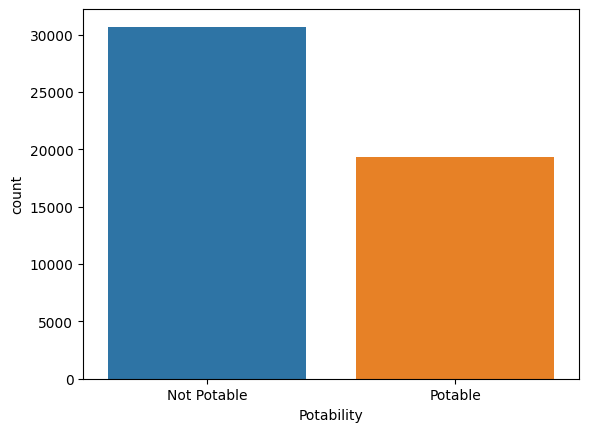

In [ ]:
sns.countplot(x = "Potability",data= data, saturation=0.8)
plt.xticks(ticks=[0, 1], labels = ["Not Potable", "Potable"])
plt.show()

In [ ]:
import plotly.express as px
fig =  px.pie(data, names = "Potability", hole = 0.4, color_discrete_sequence=['red', 'green'])
fig.show ()

<Axes: xlabel='Potability', ylabel='pH'>

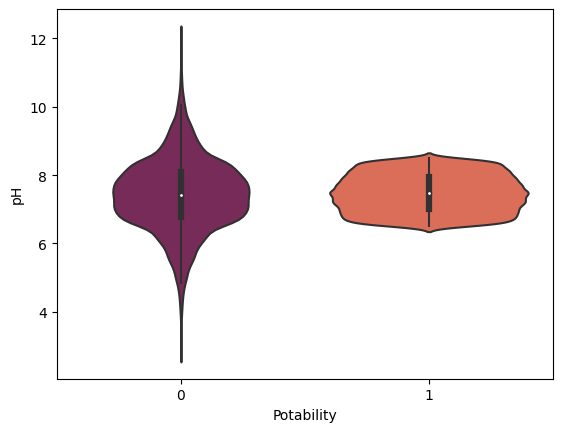

In [ ]:
sns.violinplot(x='Potability', y='pH', data=data, palette='rocket')

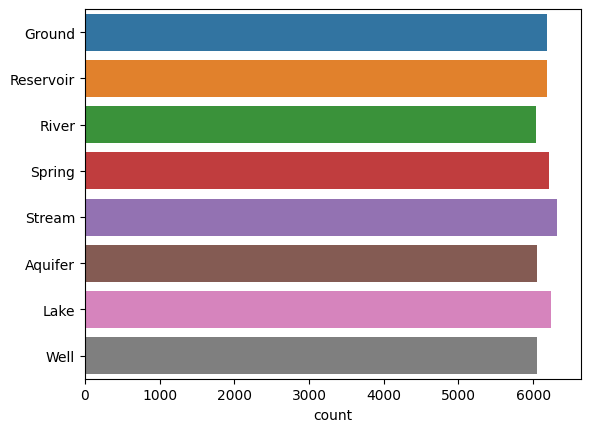

In [ ]:
sns.countplot(y=data['Source'].values);

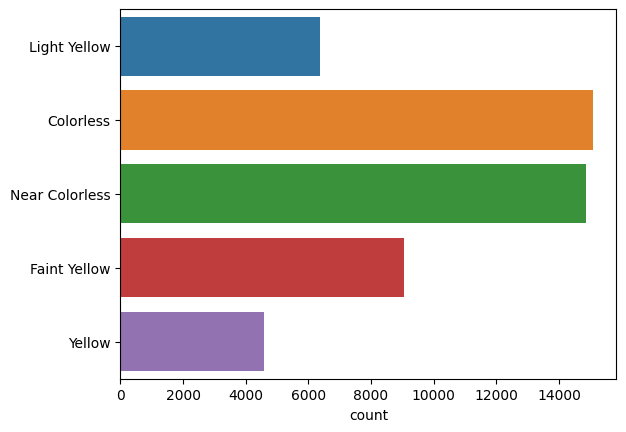

In [ ]:
sns.countplot(y=data['Color'].values);

In [ ]:
sns.pairplot(data, hue="Potability")

KeyboardInterrupt: ignored

Error in callback <function flush_figures at 0x7f95715ada60> (for post_execute):


KeyboardInterrupt: ignored

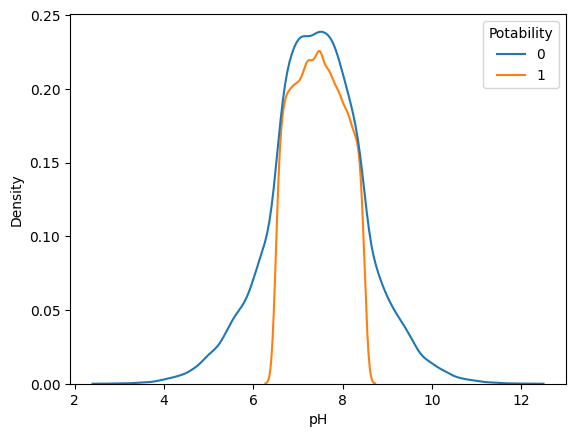

In [ ]:
sns.kdeplot(x=data['pH'],hue=data['Potability']);

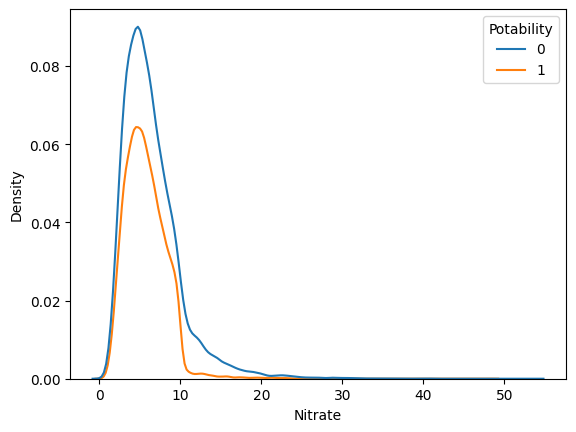

In [ ]:
sns.kdeplot(x=data['Nitrate'],hue=data['Potability']);

In [ ]:
def water_source_color_measure(df,valcol):
    fig=plt.subplots(figsize=(20, 20))
    for i,cat  in enumerate(['Lake', 'River', 'Ground', 'Spring', 'Stream', 'Aquifer','Reservoir', 'Well']):
        _=plt.subplot(4,2,i+1)
        _=sns.stripplot(x=df[df['Source']==cat]['Color'].values,y=df[df['Source']==cat][valcol].values)
        _=plt.title(f"{cat} Water's {valcol} Value Distribution by Different Color",fontsize=15)
        _=plt.xticks(fontsize=15)
        _=plt.tight_layout()
    plt.show()

<ipython-input-20-e6cea2c9af7d>:4: MatplotlibDeprecationWarning:

Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.



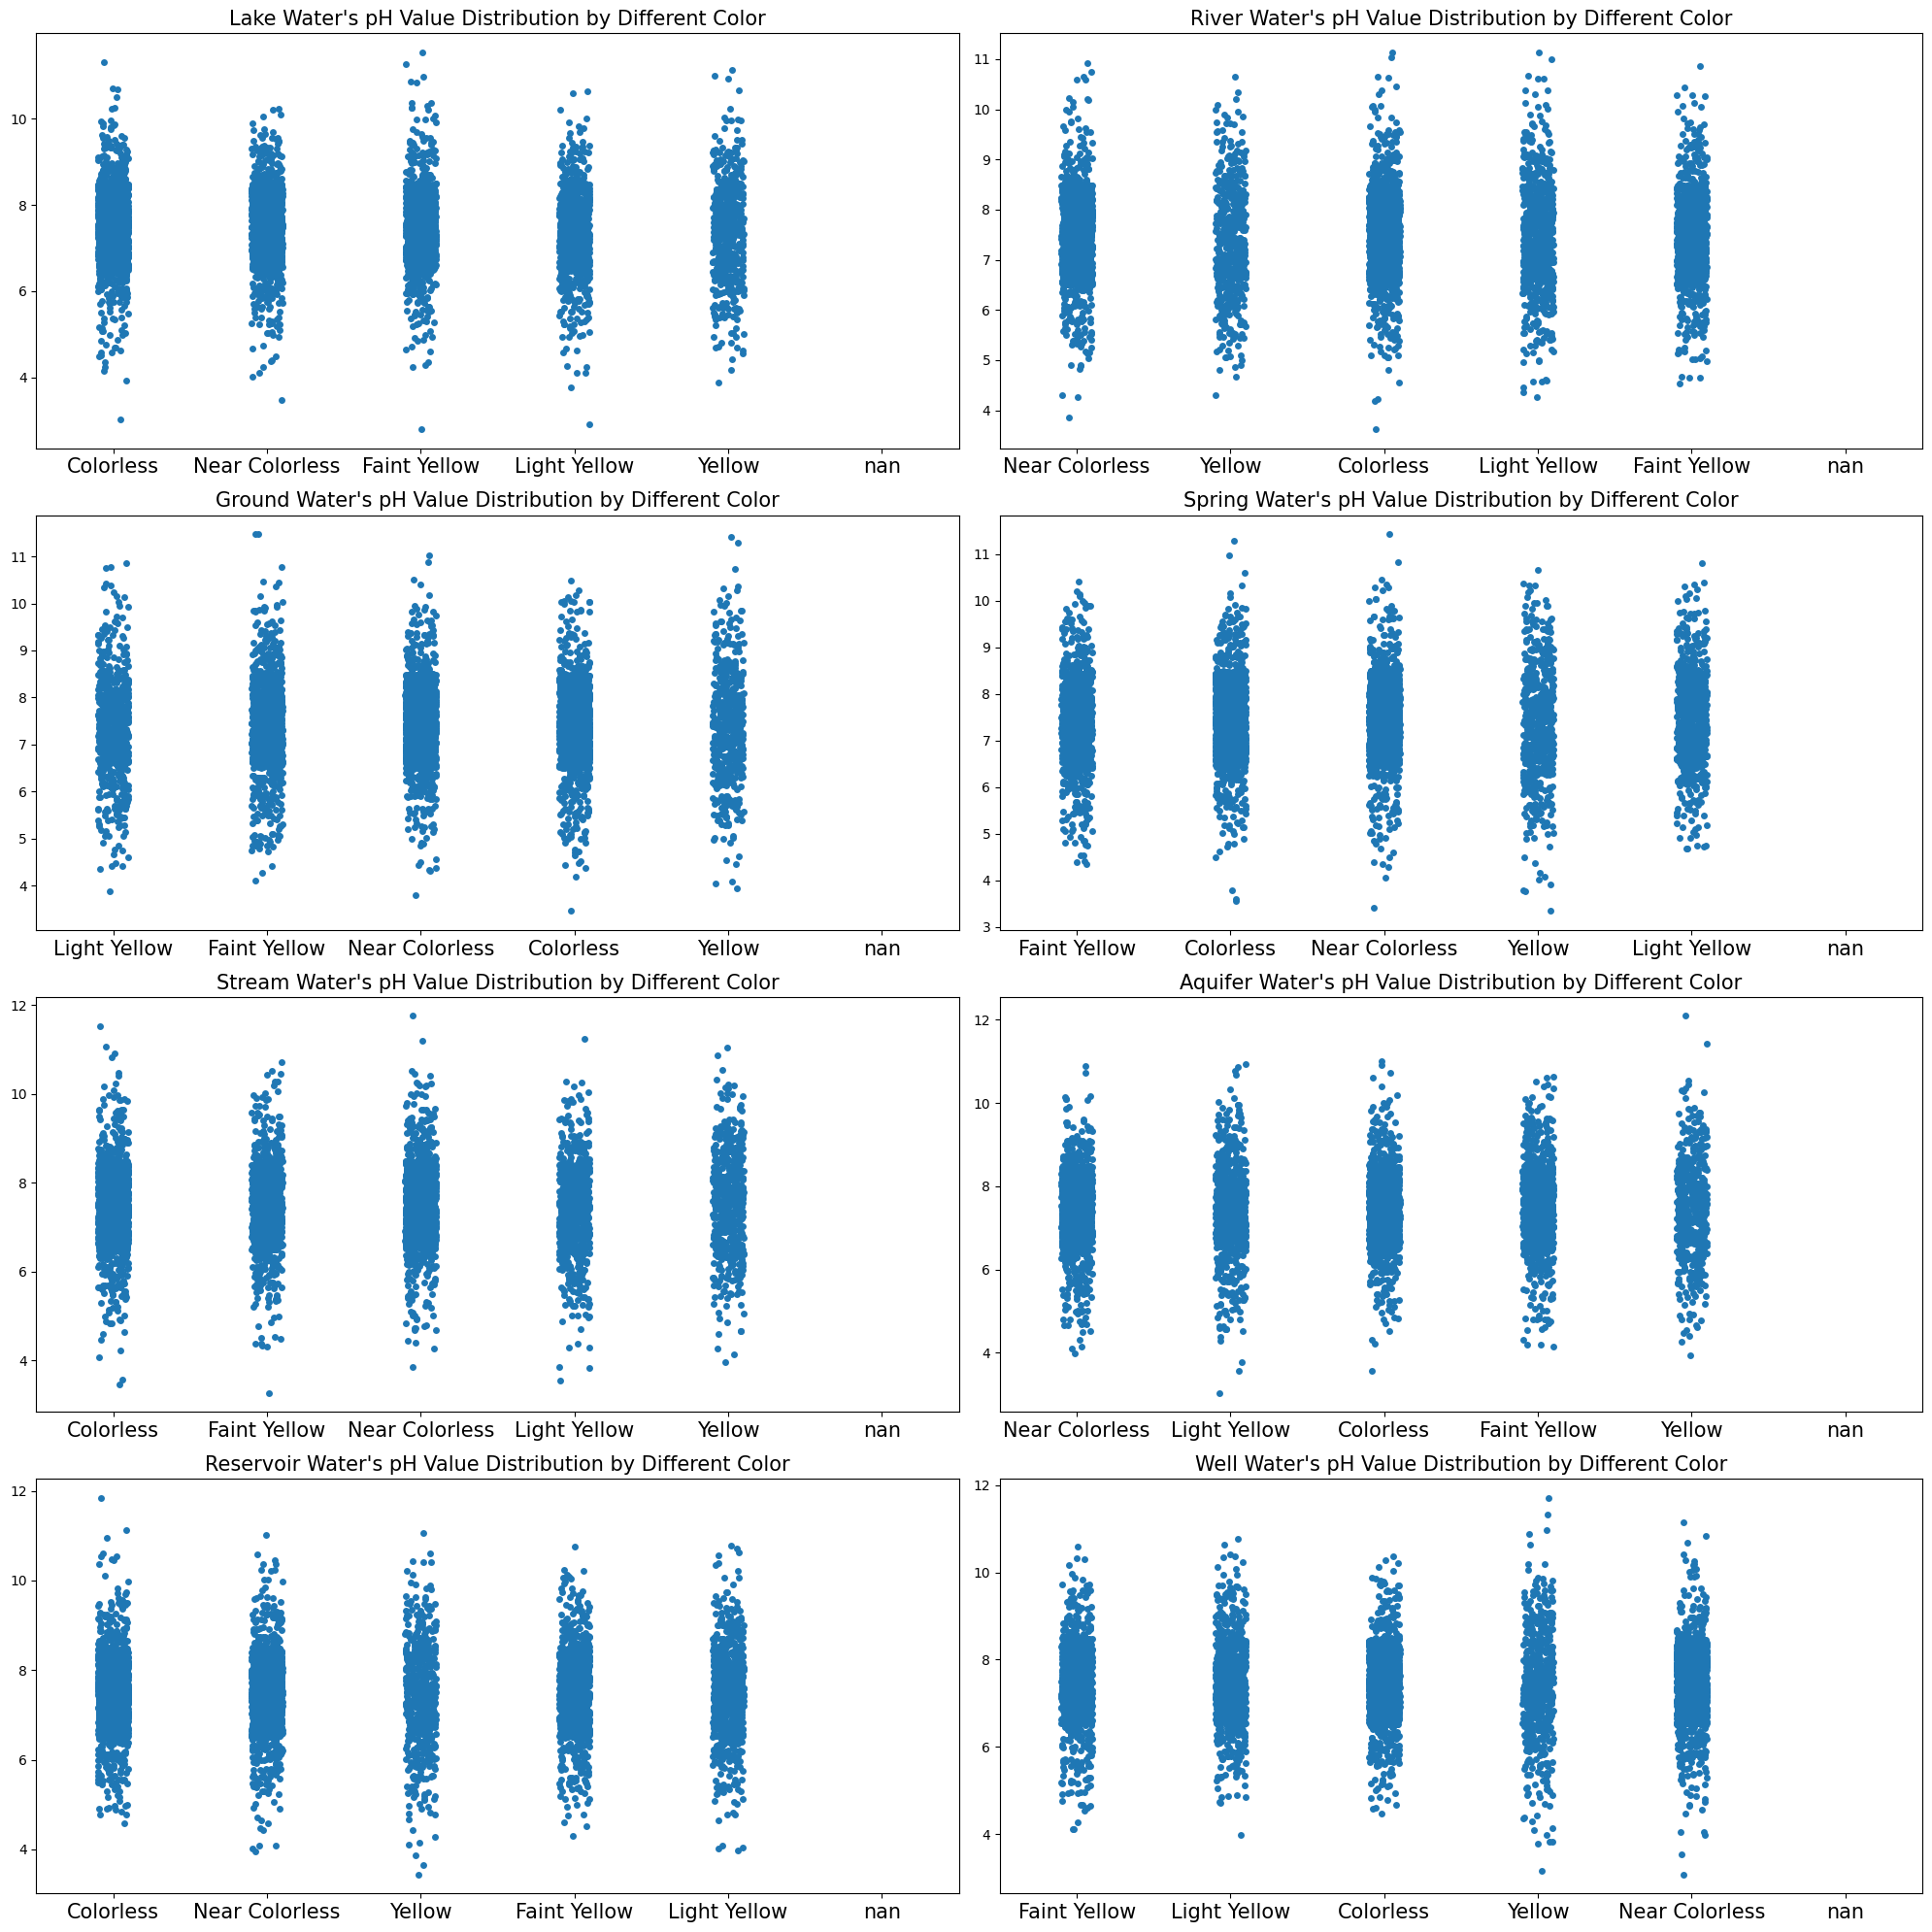

In [ ]:
water_source_color_measure(data,'pH');

<Axes: xlabel='Water Temperature', ylabel='Potability'>

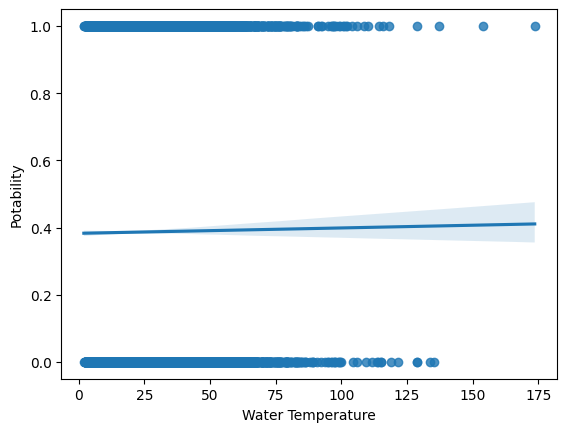

In [ ]:
x = data['Water Temperature']
y = data['Potability']
sns.regplot(x=x, y=y, data=data, logistic=True)

In [ ]:
fig = px.scatter (data, x = "Iron", y = "pH", color = "Potability",   trendline="lowess")
fig.show ()


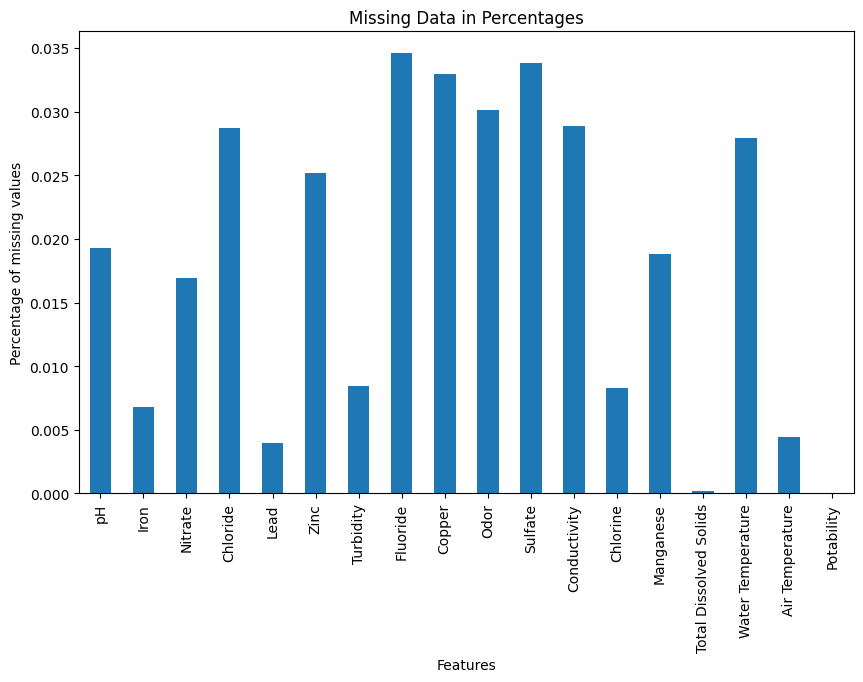

In [ ]:
data.isnull().mean().plot.bar(figsize=(10,6))
plt.ylabel('Percentage of missing values')
plt.xlabel('Features')
plt.title('Missing Data in Percentages');

In [ ]:
X = data.drop('Potability',axis=1)
Y = data['Potability']

In [ ]:
data.describe()

pH          Iron       Nitrate      Chloride           Lead  \
count  49035.000000  4.966200e+04  49155.000000  48564.000000   4.980200e+04   
mean       7.446960  1.304519e-01      6.173403    184.758151   1.516748e-03   
std        0.889855  4.796396e-01      3.296184     68.247429   3.361315e-02   
min        2.801098  4.085339e-46      0.574536     36.519099   0.000000e+00   
25%        6.891637  1.053921e-05      3.972940    138.787223  4.327630e-123   
50%        7.450435  2.280371e-03      5.600692    176.126976   3.727641e-63   
75%        8.013726  5.574463e-02      7.664772    218.529463   3.894478e-27   
max       12.098658  1.285932e+01     53.427926    867.121640   2.872971e+00   

               Zinc     Turbidity      Fluoride        Copper          Odor  \
count  4.874100e+04  4.957600e+04  48272.000000  48352.000000  48495.000000   
mean   1.554835e+00  5.263434e-01      0.962374      0.515188      1.810161   
std    1.545178e+00  9.294857e-01      0.822186      0.594394      1.069952   
min    5.547237e-07  1.207432e-12      0.000112      0.000001      0.011033   
25%    4.107115e-01  3.864923e-02      0.376092      0.129635      0.893030   
50%    1.088818e+00  2.093600e-01      0.775348      0.348546      1.787442   
75%    2.239984e+00  6.266098e-01      1.336631      0.699078      2.655562   
max    1.824161e+01  1.295938e+01      9.727751     10.057830      4.141952   

            Sulfate  Conductivity      Chlorine     Manganese  \
count  48309.000000  48558.000000  49585.000000  4.905800e+04   
mean     146.665158    425.781709      3.254536  1.109633e-01   
std       68.996286    190.191521      0.734309  4.947763e-01   
min       13.398252     30.057519      1.179372  3.235962e-43   
25%       98.015669    287.595020      2.746143  2.609552e-06   
50%      135.021181    397.924243      3.206320  6.962325e-04   
75%      182.396020    533.772620      3.698118  1.719358e-02   
max     1206.935953   1754.034369      8.843722  1.625244e+01   

       Total Dissolved Solids  Water Temperature  Air Temperature  \
count            49989.000000       48603.000000     49777.000000   
mean               267.866844          19.138858        60.087852   
std                156.084842          11.447379        18.079612   
min                  0.021243           1.892527       -14.530029   
25%                133.202918          11.311873        47.971939   
50%                267.122582          16.428208        59.937627   
75%                398.878421          23.927105        72.266974   
max                579.795282         173.622756       133.695249   

         Potability  
count  50000.000000  
mean       0.385960  
std        0.486826  
min        0.000000  
25%        0.000000  
50%        0.000000  
75%        1.000000  
max        1.000000

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size= 0.2, random_state=101,shuffle=True)
Y_train.value_counts()

0    24609
1    15391
Name: Potability, dtype: int64

In [ ]:
data = data.dropna(how='any',axis=0)
# import pandas as pd

# null_counts = df.isnull().sum()
# print("Number of null values in each column:")
# print(null_counts)

# # assuming `df` is your DataFrame
# df.dropna(inplace=True)

# # Check for missing values again
# null_counts = df.isnull().sum()
# print("Number of null values in each column:")
# print(null_counts)

In [ ]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score

# Create an imputer transformer that replaces missing values with the median
imputer = SimpleImputer(strategy='median')

# Create a pipeline that includes the imputer and the decision tree classifier
pipeline = make_pipeline(imputer, DecisionTreeClassifier(criterion='gini', min_samples_split=10, splitter='best'))

# Fit the pipeline on the training data
pipeline.fit(X_train, Y_train)

# Predict the labels of the test data using the trained pipeline
Y_pred = pipeline.predict(X_test)

# Evaluate the performance of the model
accuracy = accuracy_score(Y_test, Y_pred)
precision = precision_score(Y_test, Y_pred, average='weighted')
confusion_matrix = confusion_matrix(Y_test, Y_pred)

print('Accuracy:', accuracy)
print('Precision:', precision)
print('Confusion matrix:\n', confusion_matrix)


Accuracy: 0.9376
Precision: 0.9374887835215588
Confusion matrix:
 [[5816  277]
 [ 347 3560]]


In [ ]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score
dt=DecisionTreeClassifier(criterion= 'gini', min_samples_split= 10, splitter= 'best')
# dt.fit(X_train,Y_train)

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score

# Assuming X_train is a Pandas DataFrame with non-numeric values
# in one or more columns
encoder = LabelEncoder()
X_train_encoded = X_train.copy()

# for column in X_train.columns:
#     if X_train[column].dtype == 'object':
#         X_train_encoded[column] = encoder.fit_transform(X_train[column])

# Create and fit the decision tree classifier
dt = DecisionTreeClassifier(criterion='gini', min_samples_split=10, splitter='best')
# dt.fit(X_train_encoded, Y_train)

# Test the model and evaluate performance
# Y_pred = dt.predict(X_test_encoded)
# accuracy = accuracy_score(Y_test, Y_pred)
# conf_matrix = confusion_matrix(Y_test, Y_pred)
# precision = precision_score(Y_test, Y_pred)

# print(f"Accuracy: {accuracy}")
# print(f"Confusion matrix:\n{conf_matrix}")
# print(f"Precision: {precision}")


In [ ]:
# prediction=dt.predict(X_test)
# accuracy_dt=accuracy_score(Y_test,prediction)*100
# accuracy_dt

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(metric='manhattan', n_neighbors=22)
knn.fit(X_train,Y_train)
prediction_knn=knn.predict(X_test)
accuracy_knn=accuracy_score(Y_test,prediction_knn)*100
print('accuracy_score score     : ',accuracy_score(Y_test,prediction_knn)*100,'%')
confusion_matrix(prediction,Y_test)

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import missingno as msno
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory


# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# ML
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV, RepeatedStratifiedKFold, train_test_split
from sklearn.metrics import precision_score, confusion_matrix

from sklearn import tree

In [ ]:
d = pd.DataFrame(data["Potability"].value_counts())
fig = px.pie(d, values = "Potability", names = ["Not Potable", "Potable"], hole = 0.25, opacity = 0.8,
            labels = {"label" :"Potability","Potability":"Number of Samples"},
             color_discrete_sequence=['red', 'green'])
fig.update_layout(title = dict(text = "Pie Chart of Potability Feature"))
fig.update_traces(textposition = "outside", textinfo = "percent+label")
fig.show()
# import plotly.express as px
# fig =  px.pie(data, names = "Potability", hole = 0.4, color_discrete_sequence=['red', 'green'])
# fig.show ()

In [ ]:
data.corr()

pH      Iron   Nitrate  Chloride      Lead  \
pH                      1.000000 -0.002279 -0.009929 -0.004862 -0.007290   
Iron                   -0.002279  1.000000  0.050504  0.071178  0.006474   
Nitrate                -0.009929  0.050504  1.000000  0.068865  0.001205   
Chloride               -0.004862  0.071178  0.068865  1.000000  0.019982   
Lead                   -0.007290  0.006474  0.001205  0.019982  1.000000   
Zinc                    0.001496  0.020404  0.027612  0.029690  0.017561   
Turbidity              -0.008795  0.069531  0.078791  0.075334  0.014107   
Fluoride               -0.008947  0.054612  0.053917  0.057185  0.006235   
Copper                 -0.004334  0.062956  0.072878  0.074602  0.020818   
Odor                   -0.013323  0.059914  0.046376  0.074450 -0.005470   
Sulfate                -0.022964  0.054066  0.029613  0.045192  0.015456   
Conductivity            0.000560  0.000377  0.006039 -0.004134  0.007006   
Chlorine               -0.014605  0.044371  0.051041  0.071418  0.001482   
Manganese              -0.009614  0.071265  0.063737  0.071291  0.022877   
Total Dissolved Solids -0.003248  0.031153  0.032726  0.038622  0.003178   
Water Temperature       0.004677  0.001998 -0.001261  0.001215 -0.002650   
Air Temperature        -0.001525 -0.003895 -0.003422  0.001356  0.009338   
Potability              0.031727 -0.199313 -0.132135 -0.249461 -0.041964   

                            Zinc  Turbidity  Fluoride    Copper      Odor  \
pH                      0.001496  -0.008795 -0.008947 -0.004334 -0.013323   
Iron                    0.020404   0.069531  0.054612  0.062956  0.059914   
Nitrate                 0.027612   0.078791  0.053917  0.072878  0.046376   
Chloride                0.029690   0.075334  0.057185  0.074602  0.074450   
Lead                    0.017561   0.014107  0.006235  0.020818 -0.005470   
Zinc                    1.000000   0.041725  0.037456  0.034994  0.022636   
Turbidity               0.041725   1.000000  0.066658  0.088081  0.063618   
Fluoride                0.037456   0.066658  1.000000  0.068307  0.055369   
Copper                  0.034994   0.088081  0.068307  1.000000  0.064807   
Odor                    0.022636   0.063618  0.055369  0.064807  1.000000   
Sulfate                 0.020510   0.061484  0.042566  0.051867  0.033567   
Conductivity            0.000364  -0.000494 -0.002127  0.001619  0.001284   
Chlorine                0.024633   0.063605  0.036978  0.054034  0.039912   
Manganese               0.032232   0.077790  0.051097  0.064638  0.055075   
Total Dissolved Solids  0.014089   0.037425  0.036890  0.026347  0.023702   
Water Temperature       0.004728   0.005440 -0.002066  0.000889  0.004291   
Air Temperature         0.000054  -0.008808  0.007058  0.002507 -0.003314   
Potability             -0.335471  -0.197470 -0.370155 -0.208261 -0.130918   

                         Sulfate  Conductivity  Chlorine  Manganese  \
pH                     -0.022964      0.000560 -0.014605  -0.009614   
Iron                    0.054066      0.000377  0.044371   0.071265   
Nitrate                 0.029613      0.006039  0.051041   0.063737   
Chloride                0.045192     -0.004134  0.071418   0.071291   
Lead                    0.015456      0.007006  0.001482   0.022877   
Zinc                    0.020510      0.000364  0.024633   0.032232   
Turbidity               0.061484     -0.000494  0.063605   0.077790   
Fluoride                0.042566     -0.002127  0.036978   0.051097   
Copper                  0.051867      0.001619  0.054034   0.064638   
Odor                    0.033567      0.001284  0.039912   0.055075   
Sulfate                 1.000000     -0.008344  0.039896   0.042591   
Conductivity           -0.008344      1.000000 -0.000545  -0.000372   
Chlorine                0.039896     -0.000545  1.000000   0.048044   
Manganese               0.042591     -0.000372  0.048044   1.000000   
Total Dissolved Solids  0.019066      0.002768  0.030019

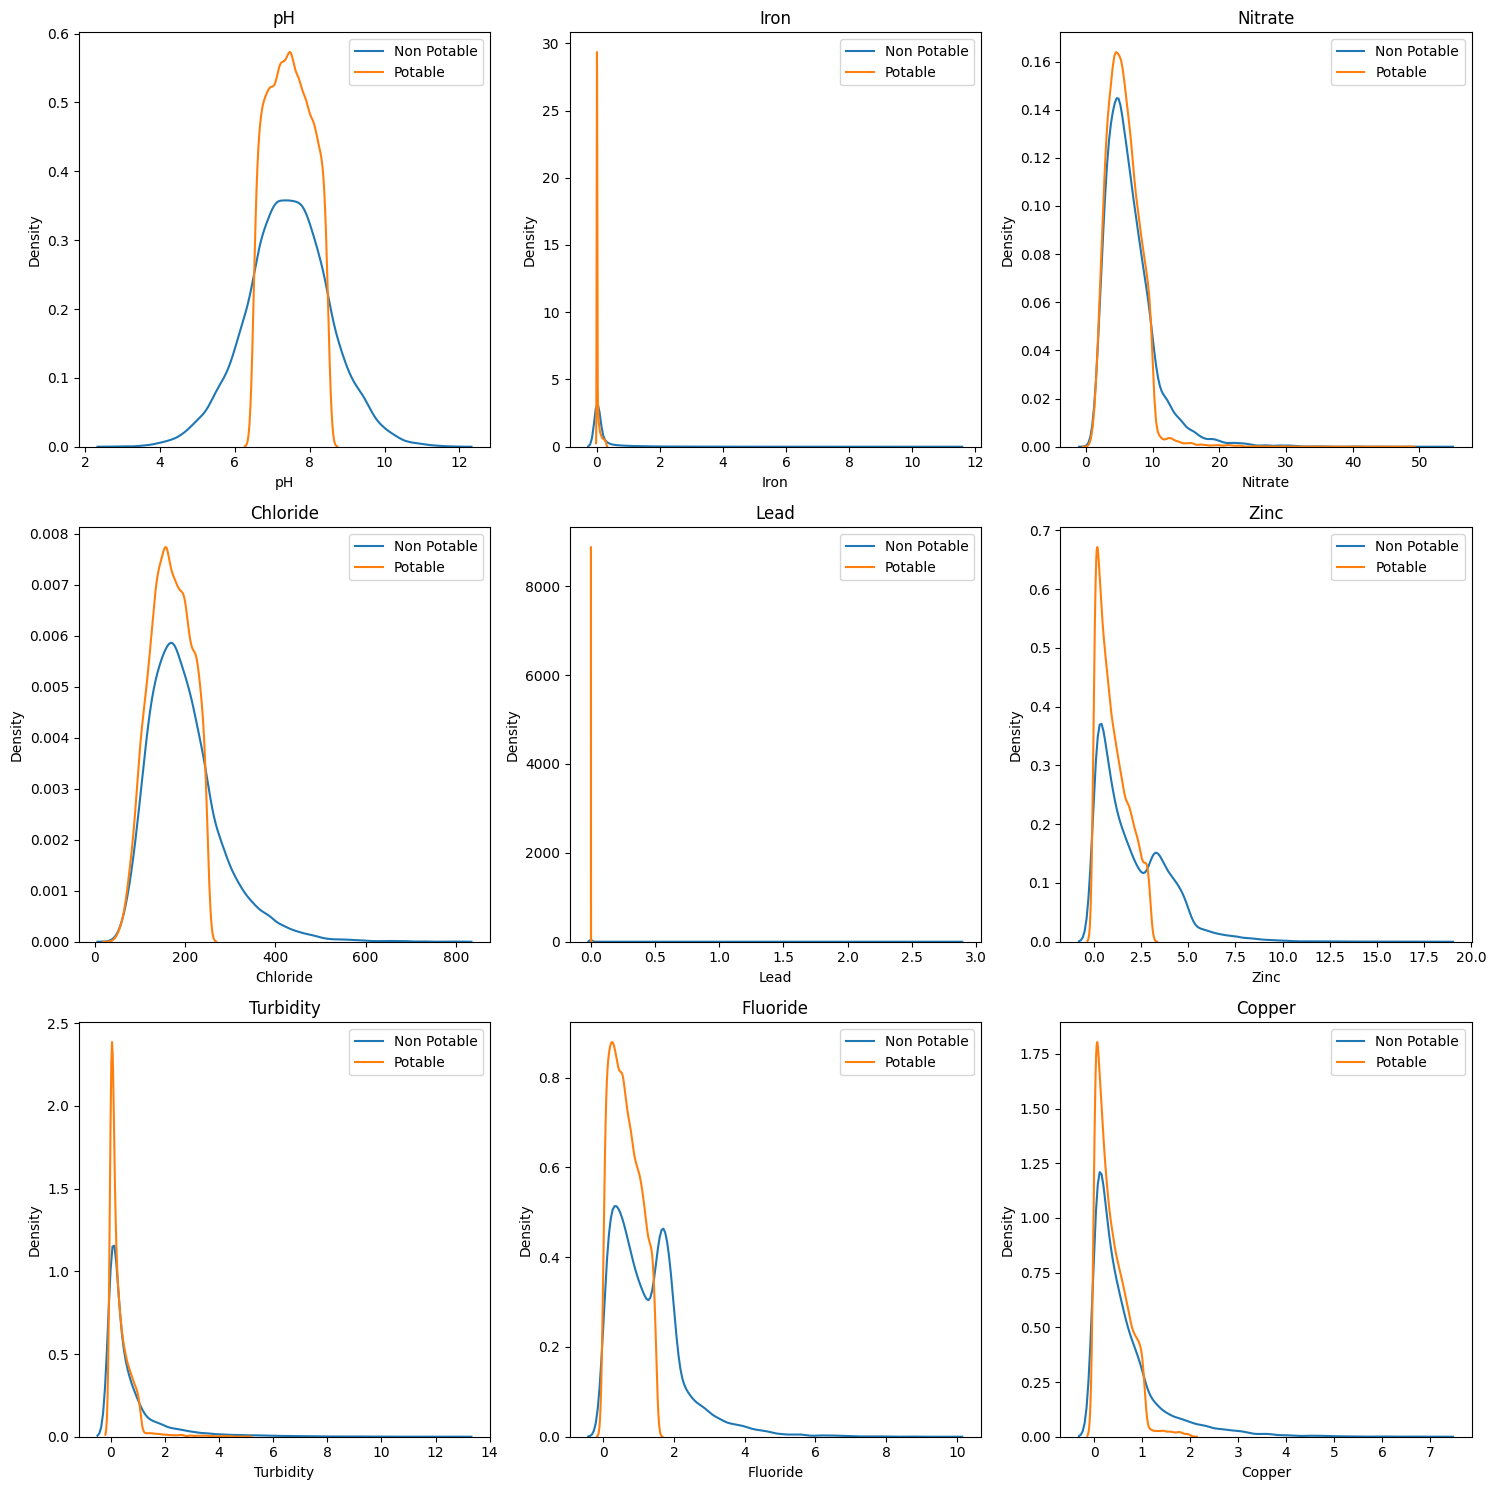

In [ ]:
non_potable = data.query("Potability == 0")
potable = data.query("Potability == 1")

plt.figure(figsize = (15,15))
for ax, col in enumerate(data.columns[:9]):
    plt.subplot(3,3, ax + 1)
    plt.title(col)
    sns.kdeplot(x = non_potable[col], label = "Non Potable")
    sns.kdeplot(x = potable[col], label = "Potable")
    plt.legend()
plt.tight_layout()

In [ ]:
data.isnull().sum()

pH                        0
Iron                      0
Nitrate                   0
Chloride                  0
Lead                      0
Zinc                      0
Turbidity                 0
Fluoride                  0
Copper                    0
Odor                      0
Sulfate                   0
Conductivity              0
Chlorine                  0
Manganese                 0
Total Dissolved Solids    0
Water Temperature         0
Air Temperature           0
Potability                0
dtype: int64

In [ ]:
# handle missing value with average of features
data["pH"].fillna(value = data["pH"].mean(), inplace = True)
data["Sulfate"].fillna(value = data["Sulfate"].mean(), inplace = True)
# data["Trihalomethanes"].fillna(value = data["Trihalomethanes"].mean(), inplace = True)

In [ ]:
X = data.drop("Potability", axis = 1).values
y = data["Potability"].values

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 3)
print("X_train",X_train.shape)
print("X_test",X_test.shape)
print("y_train",y_train.shape)
print("y_test",y_test.shape)


X_train (25116, 17)
X_test (10765, 17)
y_train (25116,)
y_test (10765,)


In [ ]:
# min-max normalization
x_train_max = np.max(X_train)
x_train_min = np.min(X_train)
X_train = (X_train - x_train_min)/(x_train_max-x_train_min)
X_test = (X_test - x_train_min)/(x_train_max-x_train_min)

In [ ]:
models = [("Decision Tree Classifier", DecisionTreeClassifier(max_depth = 3)),
          ("Random Forest Classifier",RandomForestClassifier())]
finalResults = []
cmList = []
for name, model in models:
    model.fit(X_train, y_train) # train
    model_result = model.predict(X_test) # prediction
    score = precision_score(y_test, model_result)
    cm = confusion_matrix(y_test, model_result)

    finalResults.append((name, score))
    cmList.append((name, cm))
finalResults

[('Decision Tree Classifier', 0.7949215832710979),
 ('Random Forest Classifier', 0.9998118532455316)]

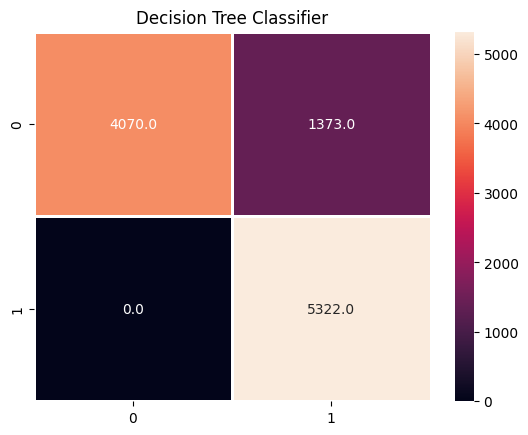

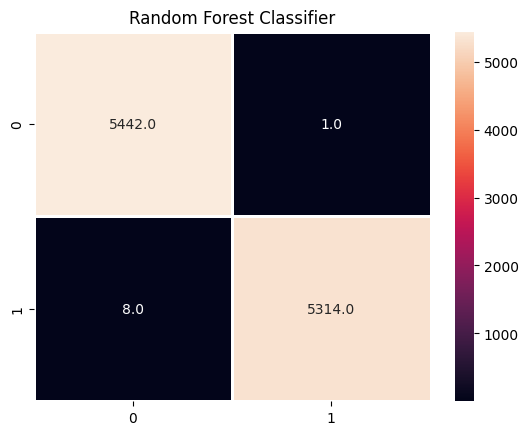

In [ ]:
for name, i in cmList:
    plt.figure()
    sns.heatmap(i, annot = True, linewidths = 0.8, fmt = ".1f")
    plt.title(name)
    plt.show()

In [ ]:
dt_clf = models[0][1]
dt_clf

DecisionTreeClassifier(max_depth=3)

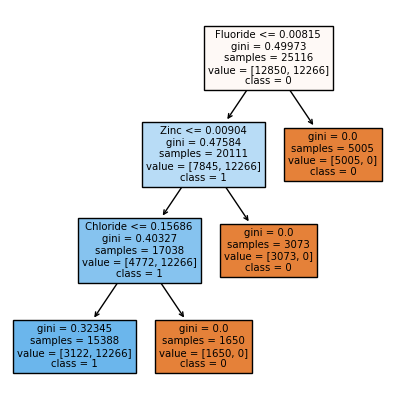

In [ ]:
plt.figure(figsize = (5,5))
tree.plot_tree(dt_clf,
               feature_names =  data.columns.tolist()[:-1],
               class_names = ["0", "1"],
               filled = True,
               precision = 5)
plt.show()

In [ ]:
model_params = {
    "Random Forest":
    {
        "model":RandomForestClassifier(),
        "params":
        {
            "n_estimators":[10, 50, 100],
            "max_features":["auto","sqrt","log2"],
            "max_depth":list(range(1,21,3))
        }
    }

}
model_params

{'Random Forest': {'model': RandomForestClassifier(),
  'params': {'n_estimators': [10, 50, 100],
   'max_features': ['auto', 'sqrt', 'log2'],
   'max_depth': [1, 4, 7, 10, 13, 16, 19]}}}